In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date, datetime

In [83]:
df = pd.read_csv("KCB.csv", skipinitialspace=True)

# CLEANING DATA
# Reverse dataframe starting with earliest stock as first index
df = df.iloc[::-1]
# Drop reversed index and add default integer index
df = df.reset_index()
df = df.drop('index', axis=1)

# # Convert date column to standard date format
for idx, row in df.iterrows():
    row.Date = datetime.strptime(row.Date, '%m/%d/%y').date()
    # row.Date = row.Date.strftime("%Y-%m-%d")
    df.at[idx,"Date"] = row.Date

df

,Date,Open,High,Low,Close,Volume
0,2005-04-08,5.77,5.77,5.77,5.77,1.296574e+05
1,2005-04-11,5.82,5.82,5.82,5.82,3.777439e+05
2,2005-04-12,5.82,5.82,5.82,5.82,1.027064e+06
3,2005-04-14,5.82,5.82,5.82,5.82,4.974514e+05
4,2005-04-15,5.87,5.87,5.87,5.87,4.055694e+05
...,...,...,...,...,...,...
4545,2023-06-30,30.00,30.00,29.05,29.30,8.234000e+05
4546,2023-07-03,29.05,29.45,29.05,29.30,1.640000e+05
4547,2023-07-04,29.50,29.50,29.20,29.45,1.555900e+06
4548,2023-07-05,29.45,29.50,29.20,29.30,3.891000e+05


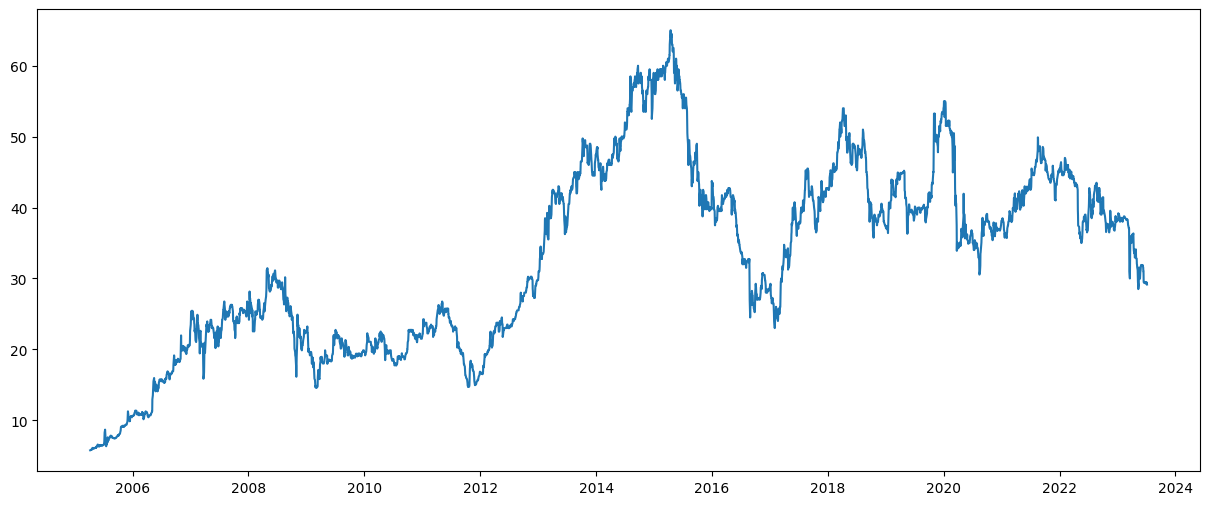

In [84]:
# CLOSING PRICE GRAPH OVER TIME
plt.figure(figsize=(15,6))
plt.plot(df.Date, df.Close)

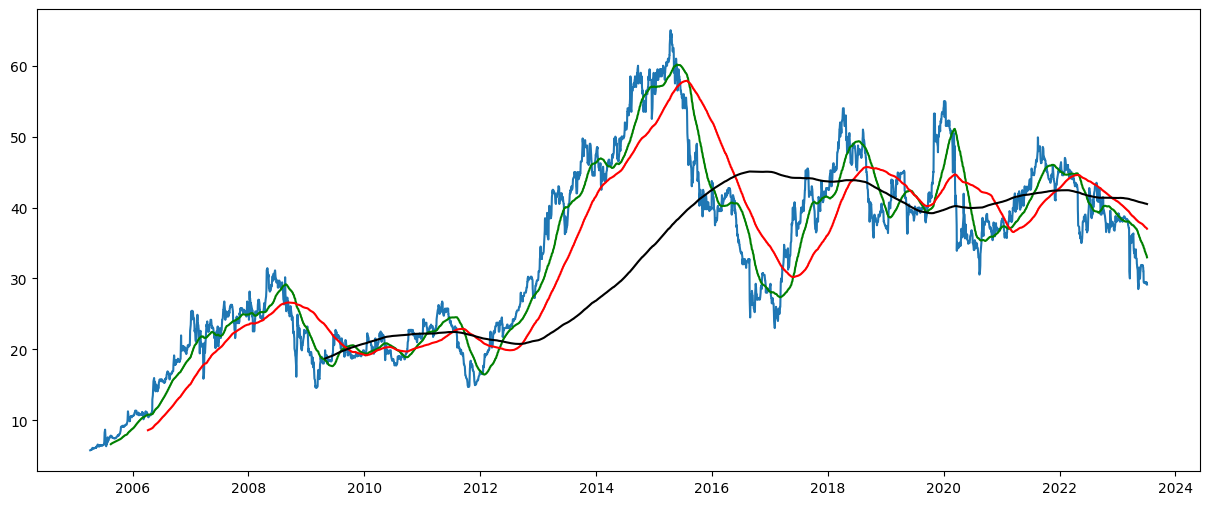

In [85]:
# MOVING AVERAGES
# Mean for a specified period of time
# e.g [90, 250, 1000] 3 Months, 1 Year or 4 years
ma90 = df.Close.rolling(90).mean()
ma250 = df.Close.rolling(250).mean()
ma1000 = df.Close.rolling(1000).mean()

plt.figure(figsize=(15,6))
plt.plot(df.Date, df.Close)
# plt.plot(df.Date, ma2, "g")
plt.plot(df.Date, ma90, "g")
plt.plot(df.Date, ma250, "r")
plt.plot(df.Date, ma1000, "black")

In [86]:
# Split data into train and test
# 70% training data and 30% testing data
data_train = pd.DataFrame(df["Close"][0 : int(len(df) * 0.70)])
data_test = pd.DataFrame(df["Close"][int(len(df) * 0.70) : int(len(df))])

print(data_train.shape)
print(data_test.shape)

(3185, 1)
(1365, 1)


In [29]:
data_train

,Close
0,5.77
1,5.82
2,5.82
3,5.82
4,5.87
...,...
3180,43.00
3181,43.25
3182,44.25
3183,44.75


In [30]:
data_test

,Close
3185,45.25
3186,45.25
3187,45.25
3188,45.00
3189,44.50
...,...
4545,29.30
4546,29.30
4547,29.45
4548,29.30


In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train_array = scaler.fit_transform(data_train)
data_train_array.shape[0]

3185

In [89]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i - 100: i])
    y_train.append(data_train_array[i, 0])
    
# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(3085, 100, 1)
(3085,)


In [39]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [40]:
model = Sequential()

# First layer
model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second layer
model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

# Third layer
model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

# Fourth layer
model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))

# Connect all layers
model.add(Dense(units=1))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [42]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
80/80 [==============================] - 10s 108ms/step - loss: 0.0239
Epoch 2/50
80/80 [==============================] - 9s 110ms/step - loss: 0.0055
Epoch 3/50
80/80 [==============================] - 9s 112ms/step - loss: 0.0052
Epoch 4/50
80/80 [==============================] - 9s 112ms/step - loss: 0.0049
Epoch 5/50
80/80 [==============================] - 9s 111ms/step - loss: 0.0043
Epoch 6/50
80/80 [==============================] - 9s 111ms/step - loss: 0.0041
Epoch 7/50
80/80 [==============================] - 9s 110ms/step - loss: 0.0042
Epoch 8/50
80/80 [==============================] - 9s 111ms/step - loss: 0.0043
Epoch 9/50
80/80 [==============================] - 9s 111ms/step - loss: 0.0038
Epoch 10/50
80/80 [==============================] - 9s 111ms/step - loss: 0.0037
Epoch 11/50
80/80 [==============================] - 9s 111ms/step - loss: 0.0042
Epoch 12/50
80/80 [==============================] - 9s 110ms/step - loss: 0.0037
Epoch 13/50
80/80 [=====

In [43]:
model.save("safModel")

INFO:tensorflow:Assets written to: safModel/assets


INFO:tensorflow:Assets written to: safModel/assets


In [34]:
data_train.tail(100)

,Close
3085,44.00
3086,44.25
3087,44.75
3088,45.00
3089,45.25
...,...
3180,43.00
3181,43.25
3182,44.25
3183,44.75


In [90]:
# Load Model
from keras.models import load_model
model = load_model("safModel")

# Append the past 100 days to testing data
past_100_days = data_train.tail(100)
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

# Scale down testing data
scaler = MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(final_df)
# print(input_data.shape)
# print(input_data)

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])
    
# Convert to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)
print()
print(x_test.shape)
print(x_test)
# print(y_test.shape)


(1365, 100, 1)
[[[0.58490566]
  [0.59433962]
  [0.61320755]
  ...
  [0.59433962]
  [0.61320755]
  [0.61320755]]

 [[0.59433962]
  [0.61320755]
  [0.62264151]
  ...
  [0.61320755]
  [0.61320755]
  [0.63207547]]

 [[0.61320755]
  [0.62264151]
  [0.63207547]
  ...
  [0.61320755]
  [0.63207547]
  [0.63207547]]

 ...

 [[0.37735849]
  [0.37735849]
  [0.37735849]
  ...
  [0.03584906]
  [0.03018868]
  [0.03018868]]

 [[0.37735849]
  [0.37735849]
  [0.37924528]
  ...
  [0.03018868]
  [0.03018868]
  [0.03584906]]

 [[0.37735849]
  [0.37924528]
  [0.38679245]
  ...
  [0.03018868]
  [0.03584906]
  [0.03018868]]]


In [76]:
print(len(x_test))
print(len(y_test))
print(x_test.shape)
print(y_test.shape)

1132
1132
(1132, 100, 1)
(1132,)


In [73]:
y_test

array([22.3 , 22.6 , 22.6 , ..., 17.7 , 17.85, 18.9 ])

43/43 [==============================] - 1s 28ms/step
Original
            Date  Close
0     2018-01-17  29.75
1     2018-01-18  29.75
2     2018-01-19  29.75
3     2018-01-22  29.50
4     2018-01-23  29.00
...          ...    ...
1360  2023-06-30  13.80
1361  2023-07-03  13.80
1362  2023-07-04  13.95
1363  2023-07-05  13.80
1364  2023-07-06  13.65

[1365 rows x 2 columns]
Predicted
            Date      Close
0     2018-01-17  27.060081
1     2018-01-18  27.227722
2     2018-01-19  27.435444
3     2018-01-22  27.672550
4     2018-01-23  27.921312
...          ...        ...
1360  2023-06-30  15.503159
1361  2023-07-03  15.420063
1362  2023-07-04  15.333120
1363  2023-07-05  15.244151
1364  2023-07-06  15.154772

[1365 rows x 2 columns]


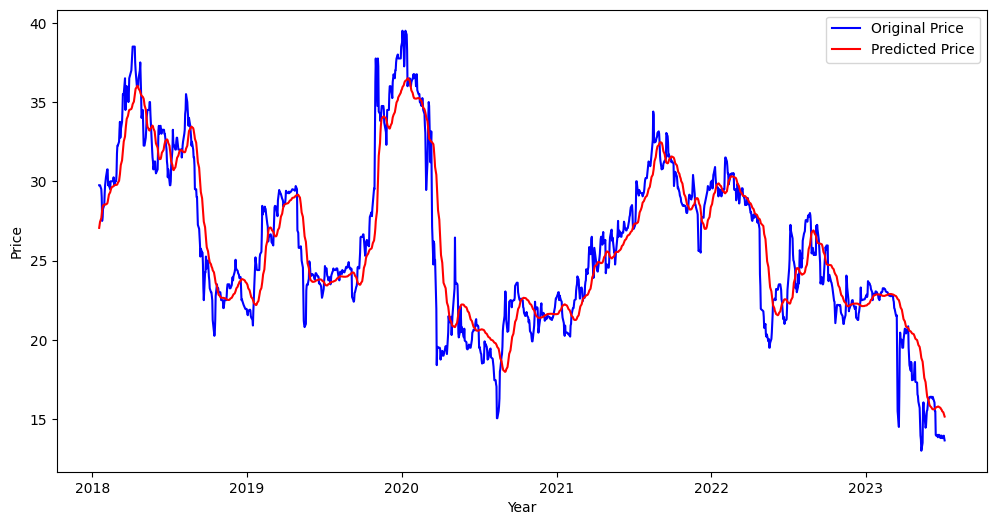

In [91]:
# Making Predictions
y_predicted = model.predict(x_test)

_scaler = scaler.scale_ # 0.03129890453834115
# Scale up
scale_factor = 1/_scaler[0]
y_predicted = (y_predicted * scale_factor) + 13
y_test = (y_test * scale_factor) + 13

# Create a dataframe
data = {
  "Date": [],
  "Close": []
}

j = len(df)
j = j - y_test.shape[0]
predicted = pd.DataFrame(data)
original = pd.DataFrame(data)
for i in range(0, y_test.shape[0]):
    original.at[i, "Date"] = df.loc[j, 'Date']
    original.at[i, "Close"] = y_test[i]
    predicted.at[i, "Date"] = df.loc[j, 'Date']
    predicted.at[i, "Close"] = y_predicted[i]
    j += 1

print("Original")
print(original)
print("Predicted")
print(predicted)
    
plt.figure(figsize=(12,6))
plt.plot(original.Date, original.Close, "b", label="Original Price")
plt.plot(predicted.Date, predicted.Close, "r", label="Predicted Price")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [92]:
# Get the last 100 days
future_inp = data_test[len(data_test)-100:]
future_inp_arr = scaler.fit_transform(future_inp)
print(fut_inp.shape)
fut_inp = future_inp_arr.reshape(1,-1)
print(fut_inp.shape)

(1, 100)
(1, 100)


In [93]:
#Creating list of the last 100 data
tmp_inp = list(fut_inp)
tmp_inp = tmp_inp[0].tolist()
len(tmp_inp)

100

In [94]:
# Predicting next 30 days price using the current data
# It will predict in sliding window manner (algorithm) with stride 1

lst_output = []
n_steps = 100
i = 0

while(i < 30):
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.2030894011259079], [0.19247278571128845], [0.182509183883667], [0.17332850396633148], [0.16478554904460907], [0.15718905627727509], [0.15070204436779022], [0.14537309110164642], [0.14117074012756348], [0.13800443708896637], [0.13575546443462372], [0.13429254293441772], [0.13346141576766968], [0.1331169307231903], [0.13312965631484985], [0.13338908553123474], [0.13380463421344757], [0.1343100368976593], [0.13485072553157806], [0.13538682460784912], [0.1358916312456131], [0.13634900748729706], [0.13675114512443542], [0.13709630072116852], [0.1373869925737381], [0.13762839138507843], [0.13782720267772675], [0.13799065351486206], [0.13812582194805145], [0.13823926448822021]]


In [95]:
len(lst_output)

30

In [96]:
# Scale up
lst_output = scaler.inverse_transform(lst_output)

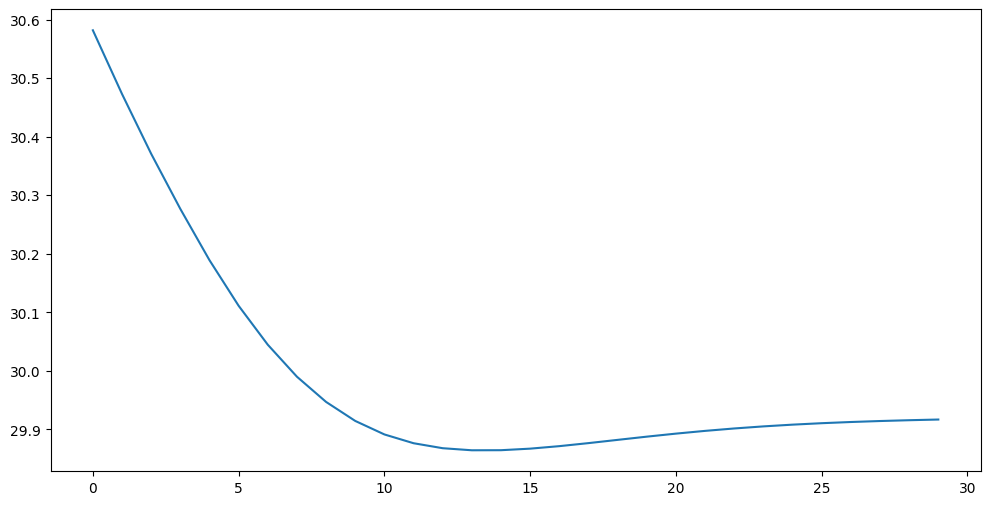

In [97]:
# lst_output
plt.figure(figsize=(12,6))
plt.plot(lst_output)

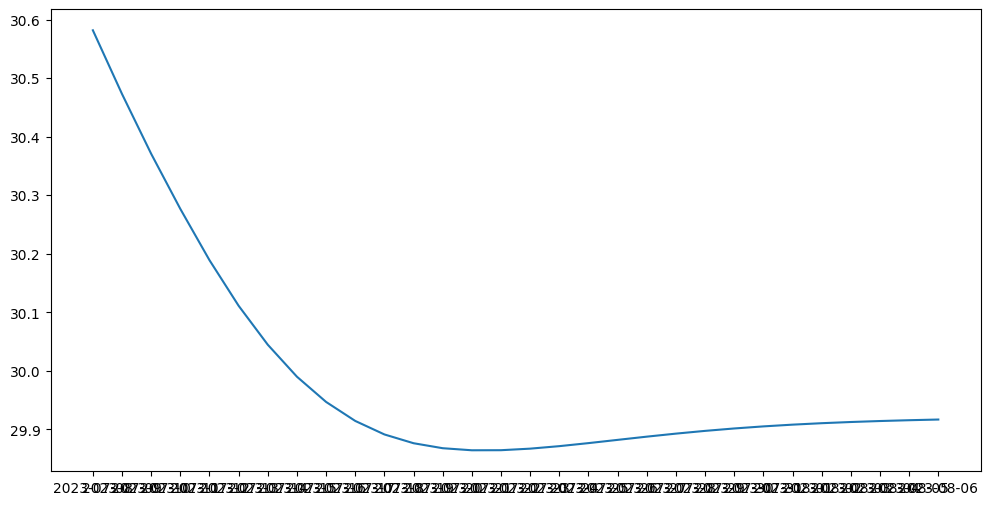

In [100]:
# Create a dataframe
import datetime as dtm
data = {
  "Date": [],
  "Close": []
}

j = len(df)
j = j - y_test.shape[0]
next_n_days = pd.DataFrame(data)
today = "2023-07-07"
today = dtm.datetime.strptime(today, "%Y-%m-%d")
for i in range(len(lst_output)):
    tomorrow = today + dtm.timedelta(days=1)
    tomorrow = tomorrow.strftime("%Y-%m-%d")
    next_n_days.at[i, "Date"] = tomorrow
    next_n_days.at[i, "Close"] = lst_output[i]
    today = tomorrow
    today = dtm.datetime.strptime(today, "%Y-%m-%d")
    
plt.figure(figsize=(12,6))
plt.plot(next_n_days.Date, next_n_days.Close)

In [99]:
original

,Date,Close
0,2018-01-17,29.75
1,2018-01-18,29.75
2,2018-01-19,29.75
3,2018-01-22,29.50
4,2018-01-23,29.00
...,...,...
1360,2023-06-30,13.80
1361,2023-07-03,13.80
1362,2023-07-04,13.95
1363,2023-07-05,13.80


In [101]:
next_n_days

,Date,Close
0,2023-07-08,30.581666
1,2023-07-09,30.472846
2,2023-07-10,30.370719
3,2023-07-11,30.276617
4,2023-07-12,30.189052
5,2023-07-13,30.111188
6,2023-07-14,30.044696
7,2023-07-15,29.990074
8,2023-07-16,29.947000
9,2023-07-17,29.914545


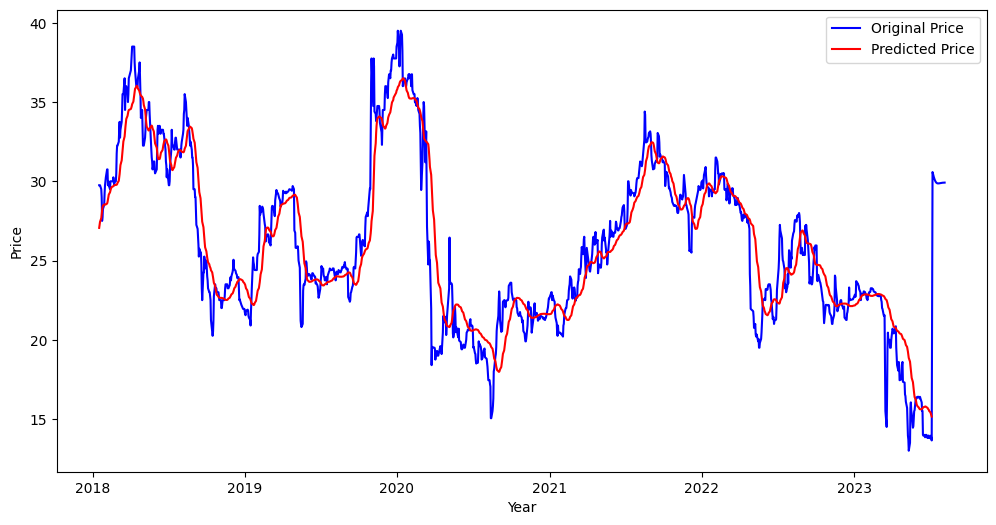

In [102]:
combined = pd.concat([original, next_n_days])
combined_2 = pd.concat([predicted, next_n_days])

plt.figure(figsize=(12,6))
plt.plot(combined.Date, combined.Close, "b", label="Original Price")
plt.plot(predicted.Date, predicted.Close, "r", label="Predicted Price")
# plt.plot(next_n_days.Date, next_n_days.Close, "g", label="Next 30 Days")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

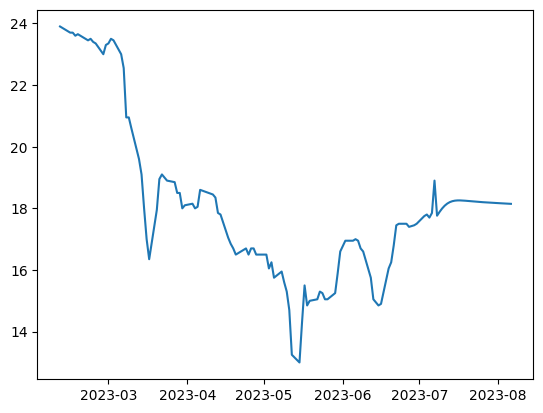

In [68]:
# The last n days, where n = 100
prev_n_days = pd.concat([original[len(original)-100:], next_n_days])
plt.plot(prev_n_days.Date, prev_n_days.Close)

In [69]:
prev_n_days

,Date,Close
1032,2023-02-10,23.900000
1033,2023-02-13,23.750000
1034,2023-02-14,23.700000
1035,2023-02-15,23.700000
1036,2023-02-16,23.600000
...,...,...
25,2023-08-02,18.164669
26,2023-08-03,18.159982
27,2023-08-04,18.155325
28,2023-08-05,18.150696


In [112]:
data = {
  "Date": [],
  "Close": []
}

j = len(df)
j = j - data_test.shape[0]

new_data_test = pd.DataFrame(data)

for i in range(0, data_test.shape[0]):
    new_data_test.at[i, "Date"] = df.loc[j, 'Date']
    new_data_test.at[i, "Close"] = data_test[j]
    j += 1

new_data_test

# combined = pd.concat([data_test, next_n_days])
# combined_2 = pd.concat([predicted, next_n_days])

# plt.figure(figsize=(12,6))
# plt.plot(combined.Date, combined.Close, "b", label="Original Price + next 30 days predictions")
# # plt.plot(predicted.Date, predicted.Close, "r", label="Predicted Price")
# # plt.plot(next_n_days.Date, next_n_days.Close, "g", label="Next 30 Days")
# plt.legend()
# plt.xlabel("Year")
# plt.ylabel("Price")
# plt.show()

KeyError: 1820

In [105]:
data_test

,Close
3185,45.25
3186,45.25
3187,45.25
3188,45.00
3189,44.50
...,...
4545,29.30
4546,29.30
4547,29.45
4548,29.30
